# Exercises

## 1. What was the average age in male and female athletes?

In [96]:
import pandas as pd

data=pd.read_csv('athletes.csv')

In [97]:
data.head()
#data.dtypes

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [98]:
from datetime import datetime, date

def date_format(x):
    try:
        x=str(x)
        number=x.find('/')
        month=int(x[:number])
        x=x[number+1:]
        number=x.find('/')
        day=int(x[:number])
        year=int(x[number+1:])
        if year<16:
            year=year+2000
        else:
            year=year+1900
        return date( year, month, day)
    except:
        print(x)

data['date_of_birth']=data['dob'].apply(lambda x: date_format(str(x)))

nan


In [99]:
import numpy as np
data=data[data['dob'].isnull()==False]

In [184]:
data['age']=date(2016,8,5)-data['date_of_birth']

data['age_int']=data['age'].apply(lambda x: x.days/365)
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,date_of_birth,age,age_int,birthday,country,code,total_medals
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,1969-10-17,17094 days,46.832877,17/10,Spain,ESP,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,1986-09-23,10909 days,29.887671,23/9,"Korea, South",KOR,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1992-05-27,8836 days,24.208219,27/5,Canada,CAN,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,1991-01-02,9347 days,25.608219,2/1,Moldova,MDA,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,1990-11-26,9384 days,25.709589,26/11,New Zealand,NZL,0


In [185]:
#Average age for female and male
data.groupby('sex')['age_int'].mean()

sex
female    26.328039
male      27.241155
Name: age_int, dtype: float64

## 2. What are the most common Dates of Birth?

*To clarify - day, month, year*

In [102]:
data['date_of_birth'].value_counts()[:12]

1988-03-05    9
1990-12-20    9
1993-02-18    9
1988-04-03    8
1993-03-03    8
1990-05-02    8
1988-04-29    8
1991-06-19    8
1989-12-14    8
1993-07-30    8
1989-03-01    8
1989-06-09    8
Name: date_of_birth, dtype: int64

## 3. How about the most common birthdays?

*To clarify - day, month*

In [103]:
data['birthday']=data['date_of_birth'].apply(lambda x: str(x.day)+'/'+ str(x.month))
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,date_of_birth,age,age_int,birthday
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,1969-10-17,17094 days,17094,17/10
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,1986-09-23,10909 days,10909,23/9
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1992-05-27,8836 days,8836,27/5
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,1991-01-02,9347 days,9347,2/1
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,1990-11-26,9384 days,9384,26/11


In [82]:
data['birthday'].value_counts()[:12]

1/1     58
5/2     51
10/2    48
20/1    47
10/1    47
19/9    47
5/4     46
5/3     45
13/1    44
30/4    44
8/3     44
29/4    44
Name: birthday, dtype: int64

## 4. What are the Countries with more than 100 medals?

In [104]:
countries=pd.read_csv('countries.csv')

countries.head()


,country,code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [105]:
data=data.merge(countries, left_on='nationality', right_on='code', how='left')
data.head()

data['total_medals']=data['gold']+data['silver']+data['bronze']
data.head()
#data.groupby('country')['total_medals'].sum()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,date_of_birth,age,age_int,birthday,country,code,total_medals
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,1969-10-17,17094 days,17094,17/10,Spain,ESP,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,1986-09-23,10909 days,10909,23/9,"Korea, South",KOR,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,1992-05-27,8836 days,8836,27/5,Canada,CAN,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,1991-01-02,9347 days,9347,2/1,Moldova,MDA,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,1990-11-26,9384 days,9384,26/11,New Zealand,NZL,0


In [118]:
data.groupby('country')['total_medals'].sum().sort_values(ascending=False)

medals=data.groupby('country')['total_medals'].agg({'sum':sum})
medals[medals['sum']>100]

,sum
country,
China,113
Germany,160
Russia,115
United Kingdom,145
United States,264


## 5. Create a bar or pie chart for the results of the previous exercise.

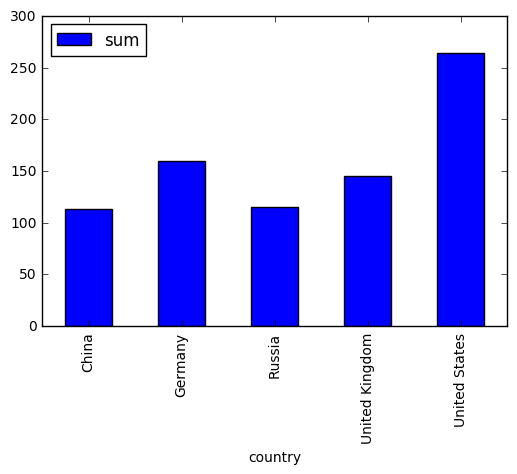

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

medals[medals['sum']>100].plot(kind='bar')

## 6. Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data? Hint: Create a scatter plot with Body weight on the x-axis and choose height as y.

In [126]:
data.sport.unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'boxing', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis', 'canoe',
       'basketball', 'golf', 'archery', 'weightlifting', 'sailing',
       'tennis', 'gymnastics'], dtype=object)

In [129]:
data_male_weight=data[(data['sport']=='weightlifting') & (data['sex']=='male')]
data_male_weight.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,date_of_birth,age,age_int,birthday,country,code,total_medals
120,242818896,Adrian Edward Zielinski,POL,male,3/28/89,1.70,94.0,weightlifting,0,0,0,1989-03-28,9992 days,9992,28/3,Poland,POL,0
186,162169475,Ahmed Mohamed,EGY,male,4/27/88,1.85,144.0,weightlifting,0,0,0,1988-04-27,10327 days,10327,27/4,Egypt,EGY,0
189,101574216,Ahmed Saad,EGY,male,11/1/86,1.60,62.0,weightlifting,0,0,0,1986-11-01,10870 days,10870,1/11,Egypt,EGY,0
403,745034260,Alexandr Spac,MDA,male,11/21/89,1.64,77.0,weightlifting,0,0,0,1989-11-21,9754 days,9754,21/11,Moldova,MDA,0
405,928138606,Alexandr Zaichikov,KAZ,male,8/17/92,1.80,105.0,weightlifting,0,0,1,1992-08-17,8754 days,8754,17/8,Kazakhstan,KAZ,1


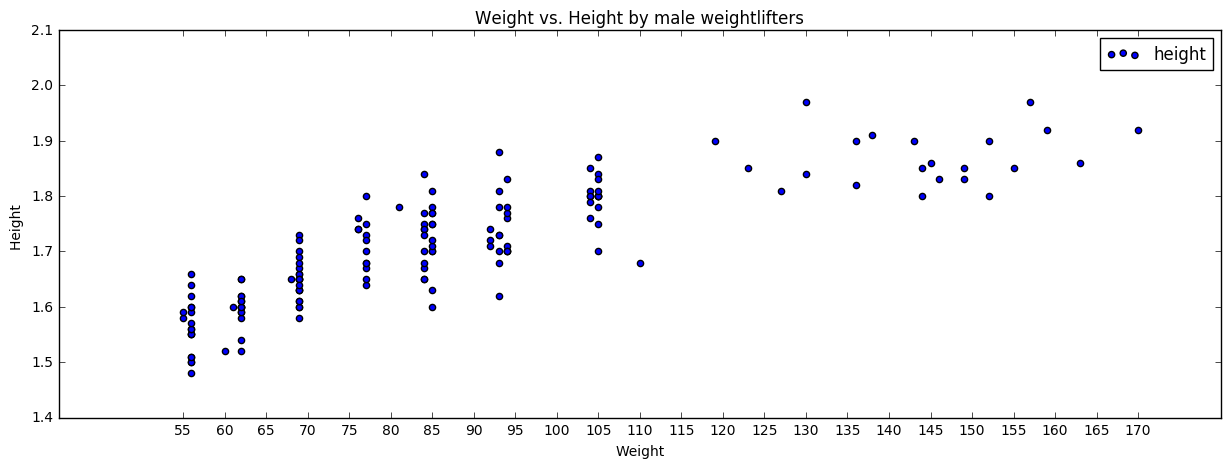

In [138]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(x=data_male_weight['weight'], y=data_male_weight['height'], marker='o')

plt.legend()
plt.ylabel("Height ")
plt.xlabel("Weight")
plt.xticks(np.arange(min(data_male_weight['weight']), max(data_male_weight['weight'])+1, 5))
plt.title("Weight vs. Height by male weightlifters")
plt.show()

#the weights are: around 56, 62, 69, 77, 85, 93, 105 and above

## 7. Generate a histogram of male and female height distribution among all participants.

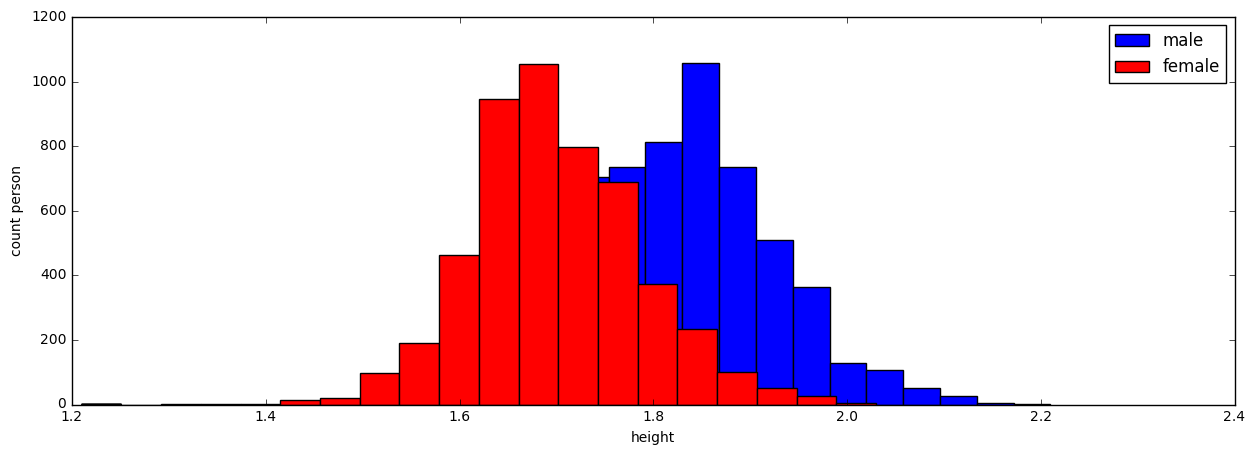

In [157]:
male_heights=data[data['sex']=='male']['height'].dropna()
female_heights=data[data['sex']=='female']['height'].dropna()

f, ax=plt.subplots(figsize=(15,5))

ax.hist(male_heights, bins=20, color='b', label='male')
ax.hist(female_heights, bins=20, color='r', label='female')
plt.legend()
plt.xlabel('height')
plt.ylabel('count person')

## 8. Using the Seaborn package create a box plot for male and female height distribution among all participants.

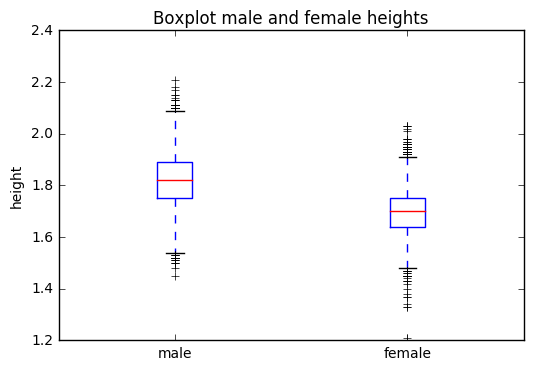

In [178]:
f, ax=plt.subplots()

ax.boxplot([male_heights, female_heights])
plt.xticks([1, 2 ], ['male', 'female'])

plt.ylabel('height')
plt.title('Boxplot male and female heights')

## 9. _Optional_: What else would you try?

In [188]:
# what kind of sports are there
data.sport.unique()


array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'boxing', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis', 'canoe',
       'basketball', 'golf', 'archery', 'weightlifting', 'sailing',
       'tennis', 'gymnastics'], dtype=object)

In [186]:
#who has the youngest  and oldest athlete
data[data.age==data.age.min()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,date_of_birth,age,age_int,birthday,country,code,total_medals
3598,32924852,Gaurika Singh,NEP,female,11/26/02,1.55,45.0,aquatics,0,0,0,2002-11-26,5001 days,13.70137,26/11,Nepal,NEP,0


In [189]:
data[data.age==data.age.max()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,date_of_birth,age,age_int,birthday,country,code,total_medals
5299,271404469,Julie Brougham,NZL,female,5/20/54,1.57,48.0,equestrian,0,0,0,1954-05-20,22723 days,62.254795,20/5,New Zealand,NZL,0


In [195]:
#which sports has the most participants?
data.groupby('sport')['id'].count().sort_values(ascending=False)

sport
athletics            2363
aquatics             1445
football              611
rowing                547
cycling               525
hockey                432
judo                  392
shooting              390
volleyball            384
sailing               379
handball              363
wrestling             353
canoe                 331
gymnastics            324
rugby sevens          300
basketball            288
boxing                286
weightlifting         258
fencing               246
equestrian            222
tennis                196
table tennis          172
badminton             172
taekwondo             128
archery               128
golf                  120
triathlon             110
modern pentathlon      72
Name: id, dtype: int64

In [199]:
#which sports in which country has the most  participants (top 20)?
data.groupby(['sport', 'country'])['id'].count().sort_values(ascending=False)[:20]

sport      country       
athletics  United States     129
           Germany            89
aquatics   United States      85
           Australia          83
           Italy              81
athletics  United Kingdom     80
aquatics   Brazil             80
           China              78
athletics  Poland             70
           Brazil             67
aquatics   Russia             67
athletics  Ukraine            65
           Canada             65
aquatics   Japan              61
athletics  Australia          60
aquatics   Hungary            58
athletics  China              55
           France             54
           Jamaica            53
           Japan              52
Name: id, dtype: int64

In [210]:
#number of gold /participants -> top10

aggr=data.groupby('country')['gold'].agg({'sum': 'sum','count': 'count'} )

aggr['ratio_gold']=aggr['sum']/aggr['count']
aggr.ratio_gold.sort_values(ascending=False)[:10]

country
United States     0.245150
Fiji              0.240741
Jamaica           0.192982
Russia            0.182456
United Kingdom    0.171123
Tajikistan        0.142857
Jordan            0.125000
Denmark           0.117188
China             0.113861
Germany           0.111111
Name: ratio_gold, dtype: float64

In [213]:
#number of total medals /participants -> top10

aggr_total=data.groupby('country')['total_medals'].agg({'sum': 'sum','count': 'count'} )

aggr_total['ratio_medals']=aggr_total['sum']/aggr_total['count']
aggr_total.ratio_medals.sort_values(ascending=False)[:10]

country
Jamaica           0.526316
United States     0.465608
Russia            0.403509
United Kingdom    0.387701
Germany           0.362812
Azerbaijan        0.321429
Denmark           0.320312
Norway            0.306452
China             0.279703
Croatia           0.272727
Name: ratio_medals, dtype: float64